In [18]:
import numpy as np
import pandas as pd
import os 
import re
import matplotlib.pyplot as plt

In [19]:
#Making the dataset from the folder 
#X is of list type having tuples where the first element is name of file and second is the content of file 
#Y is the name of the category to which that file belongs 
X = []
Y = []
for category in os.listdir("C:/Users/APOORVA/Desktop/Apoorva/ML/TextClassification/News"):
    for doc in os.listdir("C:/Users/APOORVA/Desktop/Apoorva/ML/TextClassification/News/"+category):
        with open("C:/Users/APOORVA/Desktop/Apoorva/ML/TextClassification/News/"+category+'/'+doc, "r") as f:
            X.append((doc,f.read()))
            Y.append(category)

In [20]:
#Dividing into training and testing data
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)
print(len(X_train))
print(len(X_test))

14997
5000


In [4]:
#List of stopwords to be ignored 
stopwords = ["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [23]:
s = "Hi! I am Apoorva!"
print(re.split(r'\W+', s))

['Hi', 'I', 'am', 'Apoorva', '']


In [21]:
#Making dictionary of each word with its frequency
dictionary={}
for documents in X_train: #for all documents in X_train
    for sentences in documents:
        words=sentences.split()
        for x in words:
            if x.lower() in stopwords or x.isalpha()==False or len(x)<2:  #ignore all stopwords, alpha_numerics or punctuation marks in the dictionary
                continue
            else:
                if x.lower() in dictionary.keys():  #if the word is already present in the dictionary, increase its frequency
                    dictionary[x.lower()]=dictionary[x.lower()]+1
                else: #add word to dictionary
                    dictionary[x.lower()]=1

In [23]:
#sorting the dictionary on the basis of decreasing order of frequency of characters
import operator
sorted_dictionary=sorted(dictionary.items(),key=operator.itemgetter(1),reverse=True)

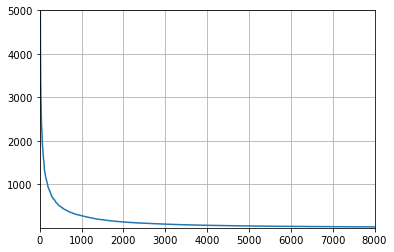

In [24]:
#Plotting graph of number of words vs frequency to decide the number of words to be selected
features=sorted_dictionary
x=[]
y=[]
for i in range(len(features)):
    x.append(i)
    y.append(features[i][1])
plt.plot(x,y)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [25]:
#Choosing Top 2000 features as our feature list 
#Final Feature List
featurelist = []
for i in range(2000):
    featurelist.append(features[i][0])
#print(featurelist)   

In [26]:
#Creating x_train dataset 
#rows : number of documents in X_train
#columns : number of features in featurelist
x_train = np.zeros([len(X_train),len(featurelist)],int)
for i in range(len(X_train)):
    s = X_train[i][1].lower()
    words = re.split(r'\W+',s)
    for word in words:
        if word in featurelist:
            x_train[i][featurelist.index(word)]+=1

In [27]:
#Creating x_test dataset 
#rows : number of documents in X_train
#columns : number of features in featurelist
x_test = np.zeros([len(X_test),len(featurelist)],int)
for i in range(len(X_test)):
    s = X_test[i][1].lower()
    words = re.split(r'\W+',s)
    for word in words:
        if word in featurelist:
            x_test[i][featurelist.index(word)]+=1

In [28]:
#Implementing sklearn Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [29]:
#Multinomial Naive Bayes from Sklearn
clf=MultinomialNB()
clf.fit(x_train,Y_train)
y_pred=clf.predict(x_test)
#Printing score and confusion matrix
print("Score on training data:",clf.score(x_train,Y_train))
print("Score on testing data:",clf.score(x_test,Y_test))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

Score on training data: 0.8690404747616189
Score on testing data: 0.8298
[[184   0   0   1   0   0   0   2   5   1   0   0   0   2   0   3   0   0
    2  33]
 [  0 203  18  13   2   5   3   2   1   1   0   0   2   3   0   0   0   0
    0   0]
 [  0   4 229   5   1   8   1   0   0   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   4 209  11   0  13   1   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   1   1  17 206   0   8   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0  23  25   9   2 170   2   1   1   1   0   1   1   1   3   0   0   0
    0   0]
 [  0   0   2  12   3   0 219   8   3   0   2   0   7   2   3   0   0   0
    0   0]
 [  0   1   0   2   6   1  12 212  21   1   1   0   8   0   2   0   2   0
    0   0]
 [  2   0   0   2   2   0   8   9 253   1   1   0   2   0   0   0   2   0
    2   0]
 [  0   0   0   0   0   0   6   1   1 228   9   0   0   0   1   0   0   0
    2   0]
 [  0   0   0   0   0   1   1   0   2   4 222   0   0   0   0   0   0   0
   

In [ ]:
#Implementing Naive Bayes from Scratch

In [27]:
print(x_train[0])

[9 2 3 ... 0 0 0]


In [42]:
#to create dictionary
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in featurelist:
            #Calculating total word in feature
            l=(x_train_with_i[:,featurelist.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

In [43]:
#taking log in calculating probabilities for avoiding negative terms
def probability(x_test,result,classes):
    prob=np.log(result[classes]["length"])-np.log(result["total_doc"])
    feature=list(result[classes].keys())
   #for current class, we stored features, "total_words" and "total_count", so to get the count of features we do -2
    for j in range (len(feature)-2):
        xj=x_test[j] #value of jth feature
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #+1 for Laplace correction
            num=result[classes][feature[j]]+1
            den=result[classes]["word_in_class"]+len(result[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [44]:
#predicts the class in which this point belongs to
def predict_for_single(x_test,result):
    first_run=True
    classes=result.keys() #all possible classes in our data
    for i in classes: #for each class
        if i=="total_doc":
            continue
        prob=probability(x_test,result,i) #probability of i being in x_test
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [45]:
#make predictions
def predict_(x_test,result):
    y_pred=[] #empty array created
    for x in x_test:  #go through testing data
        y_pred.append(predict_for_single(x,result)) #add result to our y_pred
    return y_pred

In [46]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [47]:
result = fit(x_train, Y_train)
result

{'total_doc': 14997,
 'comp.graphics': {'not': 681,
  'apr': 672,
  'gmt': 643,
  'can': 898,
  'will': 514,
  'one': 373,
  'article': 315,
  'no': 373,
  'like': 335,
  'just': 249,
  'people': 118,
  'get': 317,
  'university': 462,
  'know': 309,
  'think': 159,
  'may': 273,
  'use': 348,
  'also': 389,
  'new': 174,
  'even': 106,
  'good': 169,
  'make': 115,
  'many': 195,
  'see': 187,
  'two': 142,
  'much': 155,
  'time': 174,
  'say': 72,
  'want': 153,
  'anyone': 232,
  'first': 108,
  'need': 258,
  'us': 86,
  'used': 168,
  'way': 125,
  'world': 183,
  'go': 89,
  'now': 167,
  'really': 61,
  'believe': 32,
  'since': 80,
  'still': 65,
  'right': 66,
  'computer': 395,
  'find': 209,
  'something': 105,
  'going': 42,
  'take': 67,
  'might': 71,
  'using': 219,
  'said': 30,
  'please': 265,
  'system': 293,
  'god': 4,
  'news': 1262,
  'never': 37,
  'back': 81,
  'last': 66,
  'state': 572,
  'must': 69,
  'without': 86,
  'work': 140,
  'got': 92,
  'someone': 

In [48]:
Y_pred=predict_(x_test,result)

In [49]:
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print("Score on testing_data:",score(Y_test,Y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.71      0.88      0.78       233
           comp.graphics       0.78      0.80      0.79       253
 comp.os.ms-windows.misc       0.80      0.86      0.83       249
comp.sys.ibm.pc.hardware       0.79      0.85      0.82       240
   comp.sys.mac.hardware       0.83      0.90      0.87       236
          comp.windows.x       0.91      0.70      0.79       240
            misc.forsale       0.74      0.83      0.78       261
               rec.autos       0.80      0.81      0.81       269
         rec.motorcycles       0.83      0.89      0.86       284
      rec.sport.baseball       0.91      0.94      0.93       248
        rec.sport.hockey       0.98      0.95      0.96       231
               sci.crypt       0.97      0.88      0.92       233
         sci.electronics       0.80      0.89      0.84       244
                 sci.med       0.88      0.78      0.83       256
         

In [50]:
#Comparison
print("Score of inbuilt Naive Bayes implementation : ",clf.score(x_test,Y_test))
print("Score of Naive Bayes implementation from scratch : ",score(Y_test,Y_pred))

Score of inbuilt Naive Bayes implementation :  0.8298
Score of Naive Bayes implementation from scratch :  0.824
